In [1]:
# Import packages.
import random
import matplotlib
import matplotlib.pyplot as plt
import time

# First, I will create a Dice function.

In [2]:
# Creating a dice function

def rollDice():
    roll= random.randint(1,100)
    if roll == 100:
        #print (roll,'roll was 100, you lose. Play again!')
        return False
    elif roll <= 50:
        #print (roll,'roll was 1-50, you lose. Play again!')
        return False
    elif 100 > roll > 50:
        #print (roll,'roll was 51-99, you win. Play again!')
        return True
    return roll

In [3]:
# Lets do the Dice function test.

#x = 0

#while x < 100:
#    result = rollDice()
#    print(result)
#    x+=1
broke_count = 0

# Creating a simple bettor

In [4]:
#create a simple bettor
def simple_bettor(funds, initial_wager, wager_count):
    global broke_count
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)
        
        currentWager += 1
    if value < 0:
        value = 'broke'
        broke_count += 1
    #print ('Funds:', value)
    plt.plot (wX,vY)

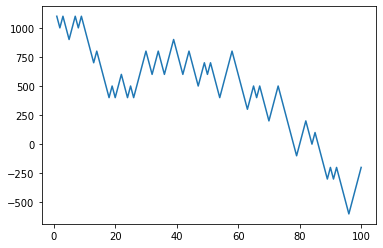

In [5]:
# Checking the simple_bettor function
simple_bettor(1000,100,100)

# Doubler bettor (Martingale strategy)

In [6]:
def doubler_bettor(funds, initial_wager, wager_count):
    # setting initial parameters and arrays.
    value = funds
    wager = initial_wager
    global broke_count
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager
    # the loop itself
    while currentWager <= wager_count:
        # what to do if you won the last wager:
        if previousWager == 'win':
            #print ('we won the last wager, great')
            if rollDice():
                value+=wager
                #print (value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print (value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    #print ('we went broke after'.currentWager, 'bets')
                    broke_count += 1
                    break
        # what to do if you lost the last wager:
        elif previousWager == 'loss':
            #print ('we lost the last one, so we will be smart and double')
            if rollDice():
                wager = previousWagerAmount * 2
                #print ('we won', wager)
                value += wager
                #print (value)
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                #print ('we lost', wager)
                value -= wager
                if value < 0:
                    #print ('we went broke after', currentWager, 'bets')
                    broke_count += 1
                    break
                
                #print (value)
                previousWager = 'loss'
                
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
        currentWager += 1
    #print (value)
    plt.plot(wX,vY)

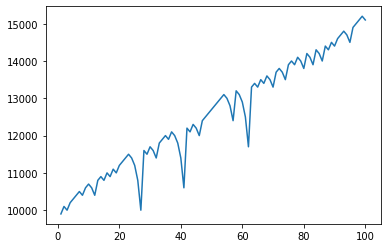

In [7]:
# Checking the doubler_bettor function
doubler_bettor(10000,100,100)
    
plt.show()
#time.sleep(555)

# Comparing the two bettors.

In [8]:
sampleSize = 100
startingFunds = 10000
wagerSize = 100
wagerCount = 1000

death rate: 0.0
survival rate: 100.0


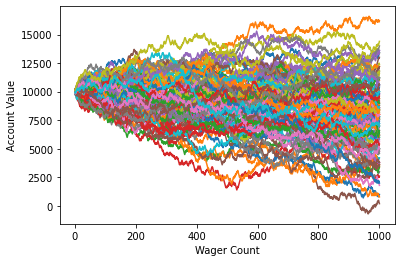

In [10]:
# Simple bettor

xy = 0
broke_count = 0
while xy<sampleSize:
    simple_bettor(startingFunds,wagerSize,wagerCount)
    xy += 1
print ('death rate:', (broke_count/float(xy)) * 100)
print ('survival rate:', 100-(broke_count/float(xy)) * 100)
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

death rate: 76.0
survival rate: 24.0


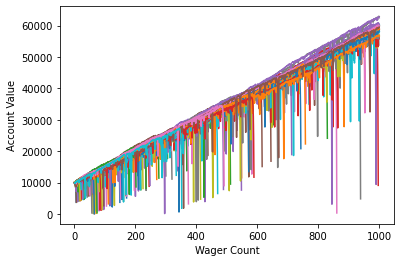

In [9]:
# Doubler bettor

xx = 0
broke_count = 0
while xx<sampleSize:
    doubler_bettor(startingFunds,wagerSize,wagerCount)
    xx += 1
print ('death rate:', (broke_count/float(xx)) * 100)
print ('survival rate:', 100-(broke_count/float(xx)) * 100)
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()